In [162]:
#en este apartado se importan las librerías que se utilizarán

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
import scipy as sc
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await piplite.install(['scikit-learn'])

import seaborn as sns
%matplotlib inline 

In [97]:
#importamos el archivo de csv a utiulizar para estas notas

df=pd.read_csv("dataset_Facebook.csv", delimiter=";")
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [98]:
lm=LinearRegression()

In [99]:
#En este caso haremos prueba con una sola variable de entrada, de manera ilustrativa

Y=df[["Total Interactions"]] #variable de salida
X=df[["Post Month"]] #variable de entrada

#se busca determinar si existe una relación entra el tipo de post y el mes cuando se publica"


In [100]:
lm.fit(X,Y)

LinearRegression()

In [101]:
Yhat=lm.predict(X) #generamos una predicción del modelo 
Yhat[0:5]

array([[222.59303098],
       [222.59303098],
       [222.59303098],
       [222.59303098],
       [222.59303098]])

In [102]:
lm.intercept_  #valor donde se general la intercepción del modelo

array([197.26526561])

In [103]:
lm.coef_  #sacamos el valor de la pendiente

array([[2.11064711]])

In [104]:
lm1=LinearRegression()
lm1

LinearRegression()

In [105]:
lm1.fit(df[['Post Month']], df[['Total Interactions']])  #Post Month= Indpenndiente  Total Interactions=Dependiente


LinearRegression()

In [106]:
#buscamos la pendiente

lm1.coef_

array([[2.11064711]])

In [107]:
#y la intercepción

lm1.intercept_

array([197.26526561])

In [108]:
Yhat=197.26+2.11*X

In [109]:
TotalInteractions=197.26+2.11*df[["Post Month"]]

In [134]:
z=df[["Page total likes", "Lifetime Post Consumers", "Lifetime Engaged Users"]]

In [135]:
lm.fit(z, df['Total Interactions'])

LinearRegression()

In [137]:
lm2=LinearRegression()
lm2.fit(df[["Page total likes", "Lifetime Engaged Users"]], df["Total Interactions"])

LinearRegression()

In [138]:
lm2.coef_

array([0.00258555, 0.22564391])

In [139]:
lm2.intercept_

-314.07510565059636

(0.0, 6650.7)

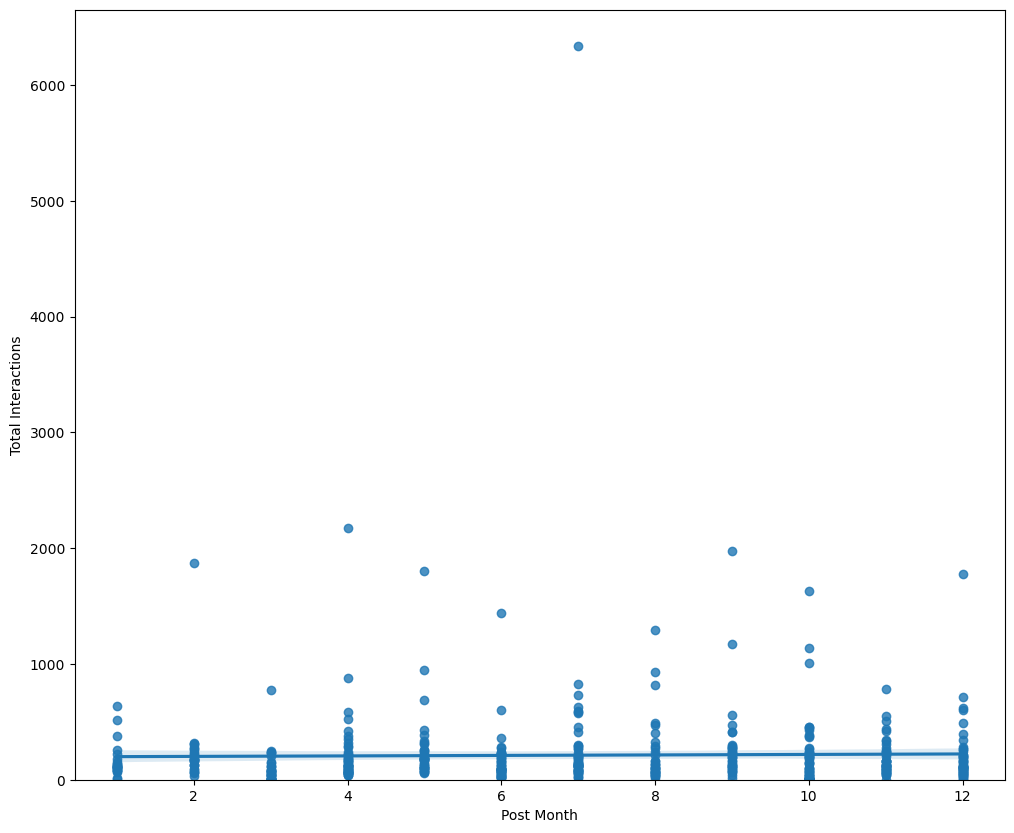

In [141]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Post Month", y="Total Interactions", data=df)
plt.ylim(0,)

In [144]:
#de acuerdo al modelo anterior, verificamos que en efecto no existe ninguna relación entre ambas variables

df[["Post Month", "Total Interactions"]].corr()

,Post Month,Total Interactions
Post Month,1.000000,0.018362
Total Interactions,0.018362,1.000000


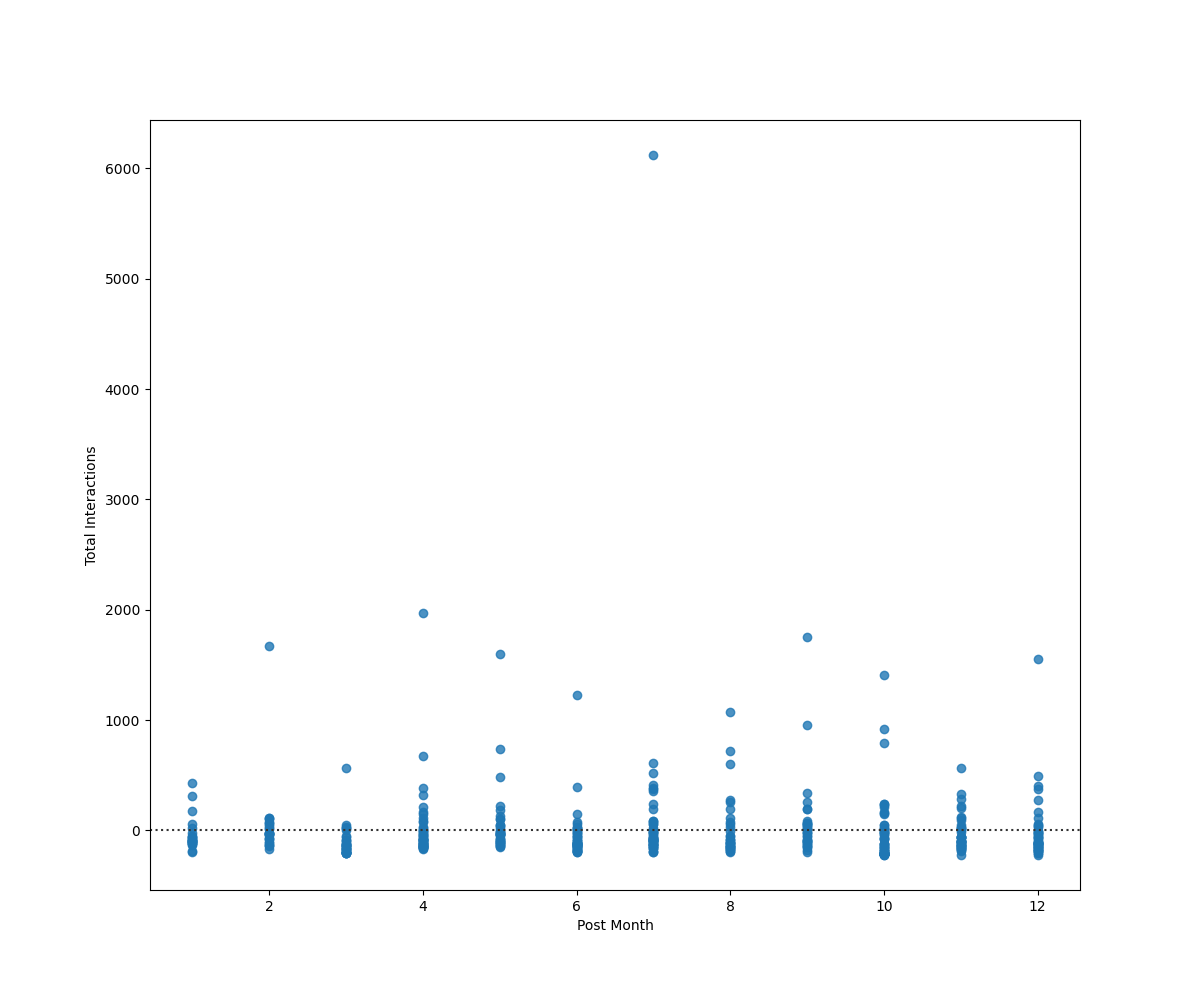

<Figure size 1200x1000 with 0 Axes>

In [146]:
#generamos la visual de los residuos, es decir, del ruido generado por el modelo

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['Post Month'],y=df['Total Interactions'])
plt.show()

In [152]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Total Interactions')

    plt.show()
    plt.close()

In [155]:
X = df['Post Month']
Y = df['Total Interactions']

          11          10         9         8        7        6
-0.00235 x  + 0.1669 x  - 5.221 x + 94.67 x - 1101 x + 8594 x
              5             4             3             2
 - 4.567e+04 x + 1.643e+05 x - 3.894e+05 x + 5.735e+05 x - 4.669e+05 x + 1.567e+05


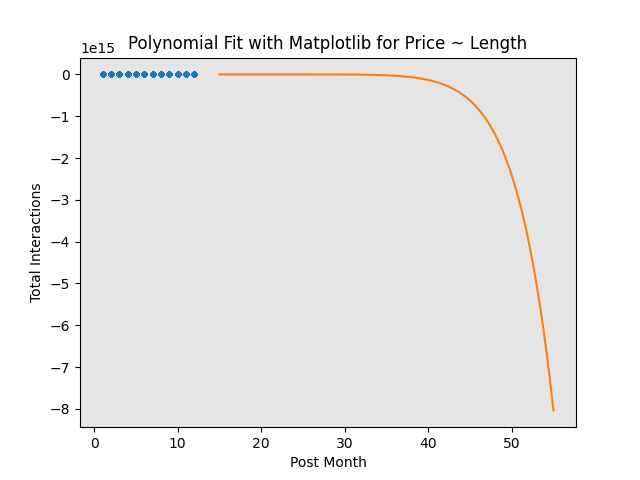

In [156]:
#Creamos un modelo con transformación polinomial

f1 = np.polyfit(X, Y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,X,Y, 'Post Month')

In [157]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [158]:
Z_pr=pr.fit_transform(z)

In [160]:
z.shape

(500, 3)

In [161]:
Z_pr.shape

(500, 10)

In [164]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

#esto quiere decir que el modelo primero estandarizará los datos, de ahí lo convertirá en una función polinomial y por último correrá el modelo

In [165]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [167]:
Z = z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [168]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([  98.98416939,  196.02865441,   93.13617629, 1645.0414693 ])